In [90]:
import re 
import pandas as pd
import datetime

def get_value(pattern, line):
    value=""
    match = re.search(pattern,line) 
    if match:
        value=match[0]
    return value    

In [2]:
df=pd.DataFrame()
pattern_ip="(\d{1,3}\.){3}\d{1,3}"
pattern_date="\d{2}\S\w{3}\S\d{4}"
pattern_time=":\d\d:\d\d"
pattern_request="GET|HEAD|POST"
pattern_keyword="(GET|HEAD|POST)\s\S\w+\S\w+"
pattern_keyword1="[/].[^/]*"
pattern_zone="[+]\d{4}"

with open('data/akumenius_com.txt') as f:
    ip=""
    _date=""
    lines = f.readlines()
    for line in lines:        
        ip=get_value(pattern_ip,line) 
        _date = get_value(pattern_date,line) 
        _time = get_value(pattern_time,line)[1:]
        zone = get_value(pattern_zone,line) 
        request = get_value(pattern_request,line) 
        keyword = get_value(pattern_keyword1,get_value(pattern_keyword,line))[1:]
        new_row = {'ip':ip, 'date':_date, 'time':_time, 'zone':zone, 'request':request,'keyword':keyword  }
        df = df.append(new_row, ignore_index=True)
df.head()

,date,ip,keyword,request,time,zone
0,,,,,,
1,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
2,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
3,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
4,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100


In [3]:
df["keyword"].unique()

array(['', 'hoteles-baratos', 'destinos-baratos',
       'destinos-caracteristicas', 'destinosEstrelles',
       'destinosCaracteristicas', 'escapadas', 'libraries', 'robots.txt',
       'includes', 'modules', 'hotels-consulted', 'about', 'contacto',
       'login-register', 'chollos', 'hoteles-de', 'legal-notice', 'faq',
       'secure-payment', 'login-registerHome', 'user', 'destinoAjax',
       'destinos-ajax2', 'escapadasInsertOfferCron',
       'escapadasEPCategoriesCron', 'HNAP1', 'destinos-insert', '2.html',
       'icon.png', 'agencias_europlayas', 'hotel-element', 'sitemap6.xml',
       'hotel-list', 'escapadas-mas', 'destinos-get', 'raton-search',
       'favicon.ico', 'sitemap5.xml', 'sitemap.xml', 'hotelDetailPopup',
       'reserve-save2', 'booking', 'reserve-submit2', 'reserve-submit',
       'reserve-confirm', 'payment-confirm', 'verify-payment',
       'reserve-confirm2', 'spicons', 'w00tw00t.at', 'raton-search2',
       'newdesign', 'apple-touch', 'wordpress', 'blog', 

In [4]:
list_k=['hoteles-baratos', 'destinos-baratos','destinos-caracteristicas', 'destinosEstrelles','destinosCaracteristicas', 'escapadas', 'libraries', 
       'hotels-consulted', 
       'chollos', 'hoteles-de', 'destinoAjax',
       'destinos-ajax2', 'escapadasInsertOfferCron',
       'escapadasEPCategoriesCron', 
       'agencias_europlayas', 'hotel-element', 
       'hotel-list', 'escapadas-mas', 'destinos-get', 
       'hotelDetailPopup',
       'destins-hotels', 'admin-destinos',
       'hotel-translate',       
       'chollos-manage', 'chollo-add', 'chollos-url', 'chollo-save',
       'chollos-update', 'chollo-edit', 'chollo-update', 'hotel-price',
       'hotels-price', 'hotels-prices', 'destinosAjax',
       'escapadas-category', 'escapada-category', 'escapadas?gclid',
       'hotel-precios',
       'hotel-precio', 'europlayas', 'promotions-manage']

In [74]:
df1=df[df["keyword"].isin(list_k)]
df1.reset_index()

,index,date,ip,keyword,request,time,zone
0,1,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
1,2,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
2,3,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
3,4,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100
4,5,23/Feb/2014,66.249.76.216,destinos-baratos,GET,03:10,+0100
...,...,...,...,...,...,...,...
139393,261834,02/Mar/2014,157.55.32.185,destinosCaracteristicas,GET,03:00,+0100
139394,261835,02/Mar/2014,66.249.76.216,escapadas,GET,03:01,+0100
139395,261836,02/Mar/2014,157.55.32.185,escapadas,GET,03:01,+0100
139396,261839,02/Mar/2014,66.249.76.216,destinos-caracteristicas,GET,03:05,+0100


In [6]:
data_ip=df1["ip"].value_counts()
_one=data_ip[data_ip<2]
list_one=_one.index
df_new=df1[~df1["ip"].isin(list_one)]
unique_ips=df_new["ip"].unique()
unique_ips = pd.Series(unique_ips, index = unique_ips)
unique_ips

66.249.76.216        66.249.76.216
5.255.253.53          5.255.253.53
157.55.35.112        157.55.35.112
193.111.141.116    193.111.141.116
5.10.83.71              5.10.83.71
                        ...       
201.31.227.195      201.31.227.195
83.63.131.193        83.63.131.193
46.222.83.180        46.222.83.180
79.155.78.117        79.155.78.117
188.135.173.80      188.135.173.80
Length: 1825, dtype: object

In [10]:
from ip2geotools.databases.noncommercial import DbIpCity
def get_location(ip):
    response = DbIpCity.get(ip, api_key='free')    
    location=response.country+", "+response.city
    return location
dict_map={}
for i in unique_ips:
    dict_map[i]=get_location(i)
print (len(dict_map))

1825


In [75]:
df1=df1[df1['ip'].isin(unique_ips)]
df1=df1.reset_index(drop=True)
df1["location"]=df1["ip"].map(dict_map)
df1.head()

,date,ip,keyword,request,time,zone,location
0,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100,"US, Mountain View"
1,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100,"US, Mountain View"
2,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100,"US, Mountain View"
3,23/Feb/2014,66.249.76.216,hoteles-baratos,GET,03:10,+0100,"US, Mountain View"
4,23/Feb/2014,66.249.76.216,destinos-baratos,GET,03:10,+0100,"US, Mountain View"


In [356]:
df1["country"]=df1["location"].apply(lambda x: x[0:x.find(",")])
df1["city"]=df1["location"].apply(lambda x: x[x.find(",")+2:])
df1["hour"]=df1.time.apply(lambda x: x[0:2])
df1["day_week"]=df1.date.apply(lambda x: datetime.datetime.strptime(x, '%d/%b/%Y').strftime('%A'))
df1["nom_week"]=df1.date.apply(lambda x: datetime.datetime.strptime(x, '%d/%b/%Y').strftime('%w'))
df1["keyword"]=df1.keyword.apply(lambda x: x.upper().replace("-", ""))
df1["keyword"]=df1["keyword"].apply(lambda x: "DESTINOS" if x.find('DESTINO')!=-1 else x)
df1["keyword"]=df1["keyword"].apply(lambda x: "HOTEL" if x.find('HOTEL')!=-1 else x)
df1["keyword"]=df1["keyword"].apply(lambda x: "CHOLLO" if x.find('CHOLLO')!=-1 else x)
df1["keyword"]=df1["keyword"].apply(lambda x: "ESCAPADA" if x.find('ESCAPADA')!=-1 else x)
df1["keyword"]=df1["keyword"].apply(lambda x: "EUROPLAYAS" if x.find('EUROPLAYAS')!=-1 else x)

df1.head()

,date,ip,keyword,request,time,zone,location,country,city,hour,day_week,nom_week
0,23/Feb/2014,66.249.76.216,HOTEL,GET,03:10,+0100,"US, Mountain View",US,Mountain View,03,Sunday,0
1,23/Feb/2014,66.249.76.216,HOTEL,GET,03:10,+0100,"US, Mountain View",US,Mountain View,03,Sunday,0
2,23/Feb/2014,66.249.76.216,HOTEL,GET,03:10,+0100,"US, Mountain View",US,Mountain View,03,Sunday,0
3,23/Feb/2014,66.249.76.216,HOTEL,GET,03:10,+0100,"US, Mountain View",US,Mountain View,03,Sunday,0
4,23/Feb/2014,66.249.76.216,DESTINOS,GET,03:10,+0100,"US, Mountain View",US,Mountain View,03,Sunday,0


In [357]:
df_all_key=df1.groupby(["keyword","nom_week","day_week","hour"]).agg({"time":"count"}).reset_index()
#top 5 of keyword 
key=df1.groupby(["keyword"]).count().sort_values("date",ascending=False)[0:5].reset_index()
df_top_key=df_all_key[df_all_key["keyword"].isin(key["keyword"])]
df_top_key.head()


,keyword,nom_week,day_week,hour,time
82,DESTINOS,0,Sunday,00,64
83,DESTINOS,0,Sunday,01,78
84,DESTINOS,0,Sunday,02,51
85,DESTINOS,0,Sunday,03,1062
86,DESTINOS,0,Sunday,04,985


In [358]:
df_all_key.head()

,keyword,nom_week,day_week,hour,time
0,CHOLLO,0,Sunday,02,4
1,CHOLLO,0,Sunday,03,2
2,CHOLLO,0,Sunday,04,1
3,CHOLLO,0,Sunday,05,1
4,CHOLLO,0,Sunday,09,1


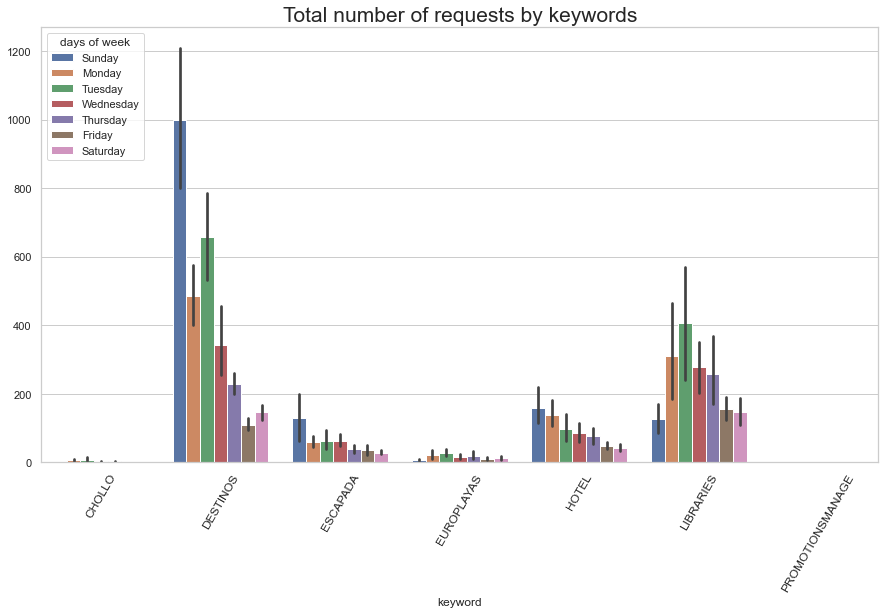

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x="keyword", y="time", hue="day_week", data=df_all_key)
sns.set_style("whitegrid")

ax.set_title('Total number of requests by keywords', fontsize = 21)


labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=60,fontsize = 12) 
ax.set_ylabel('',fontsize = 20)
plt.legend(title="days of week")
plt.show()

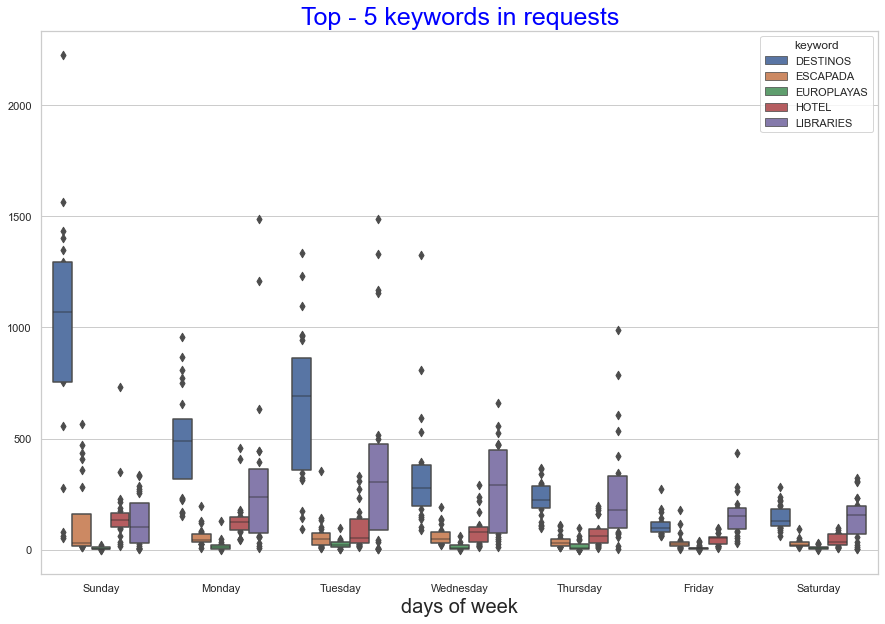

In [426]:
fig, ax = plt.subplots(figsize=(15,10))

ax1=sns.boxenplot(x="day_week", y="time", hue="keyword", data=df_top_key)
ax.set_title('Top - 5 keywords in requests', fontsize = 25, color="blue")
ax.set_ylabel('',fontsize = 20)
ax.set_xlabel('days of week',fontsize = 20)
plt.show()

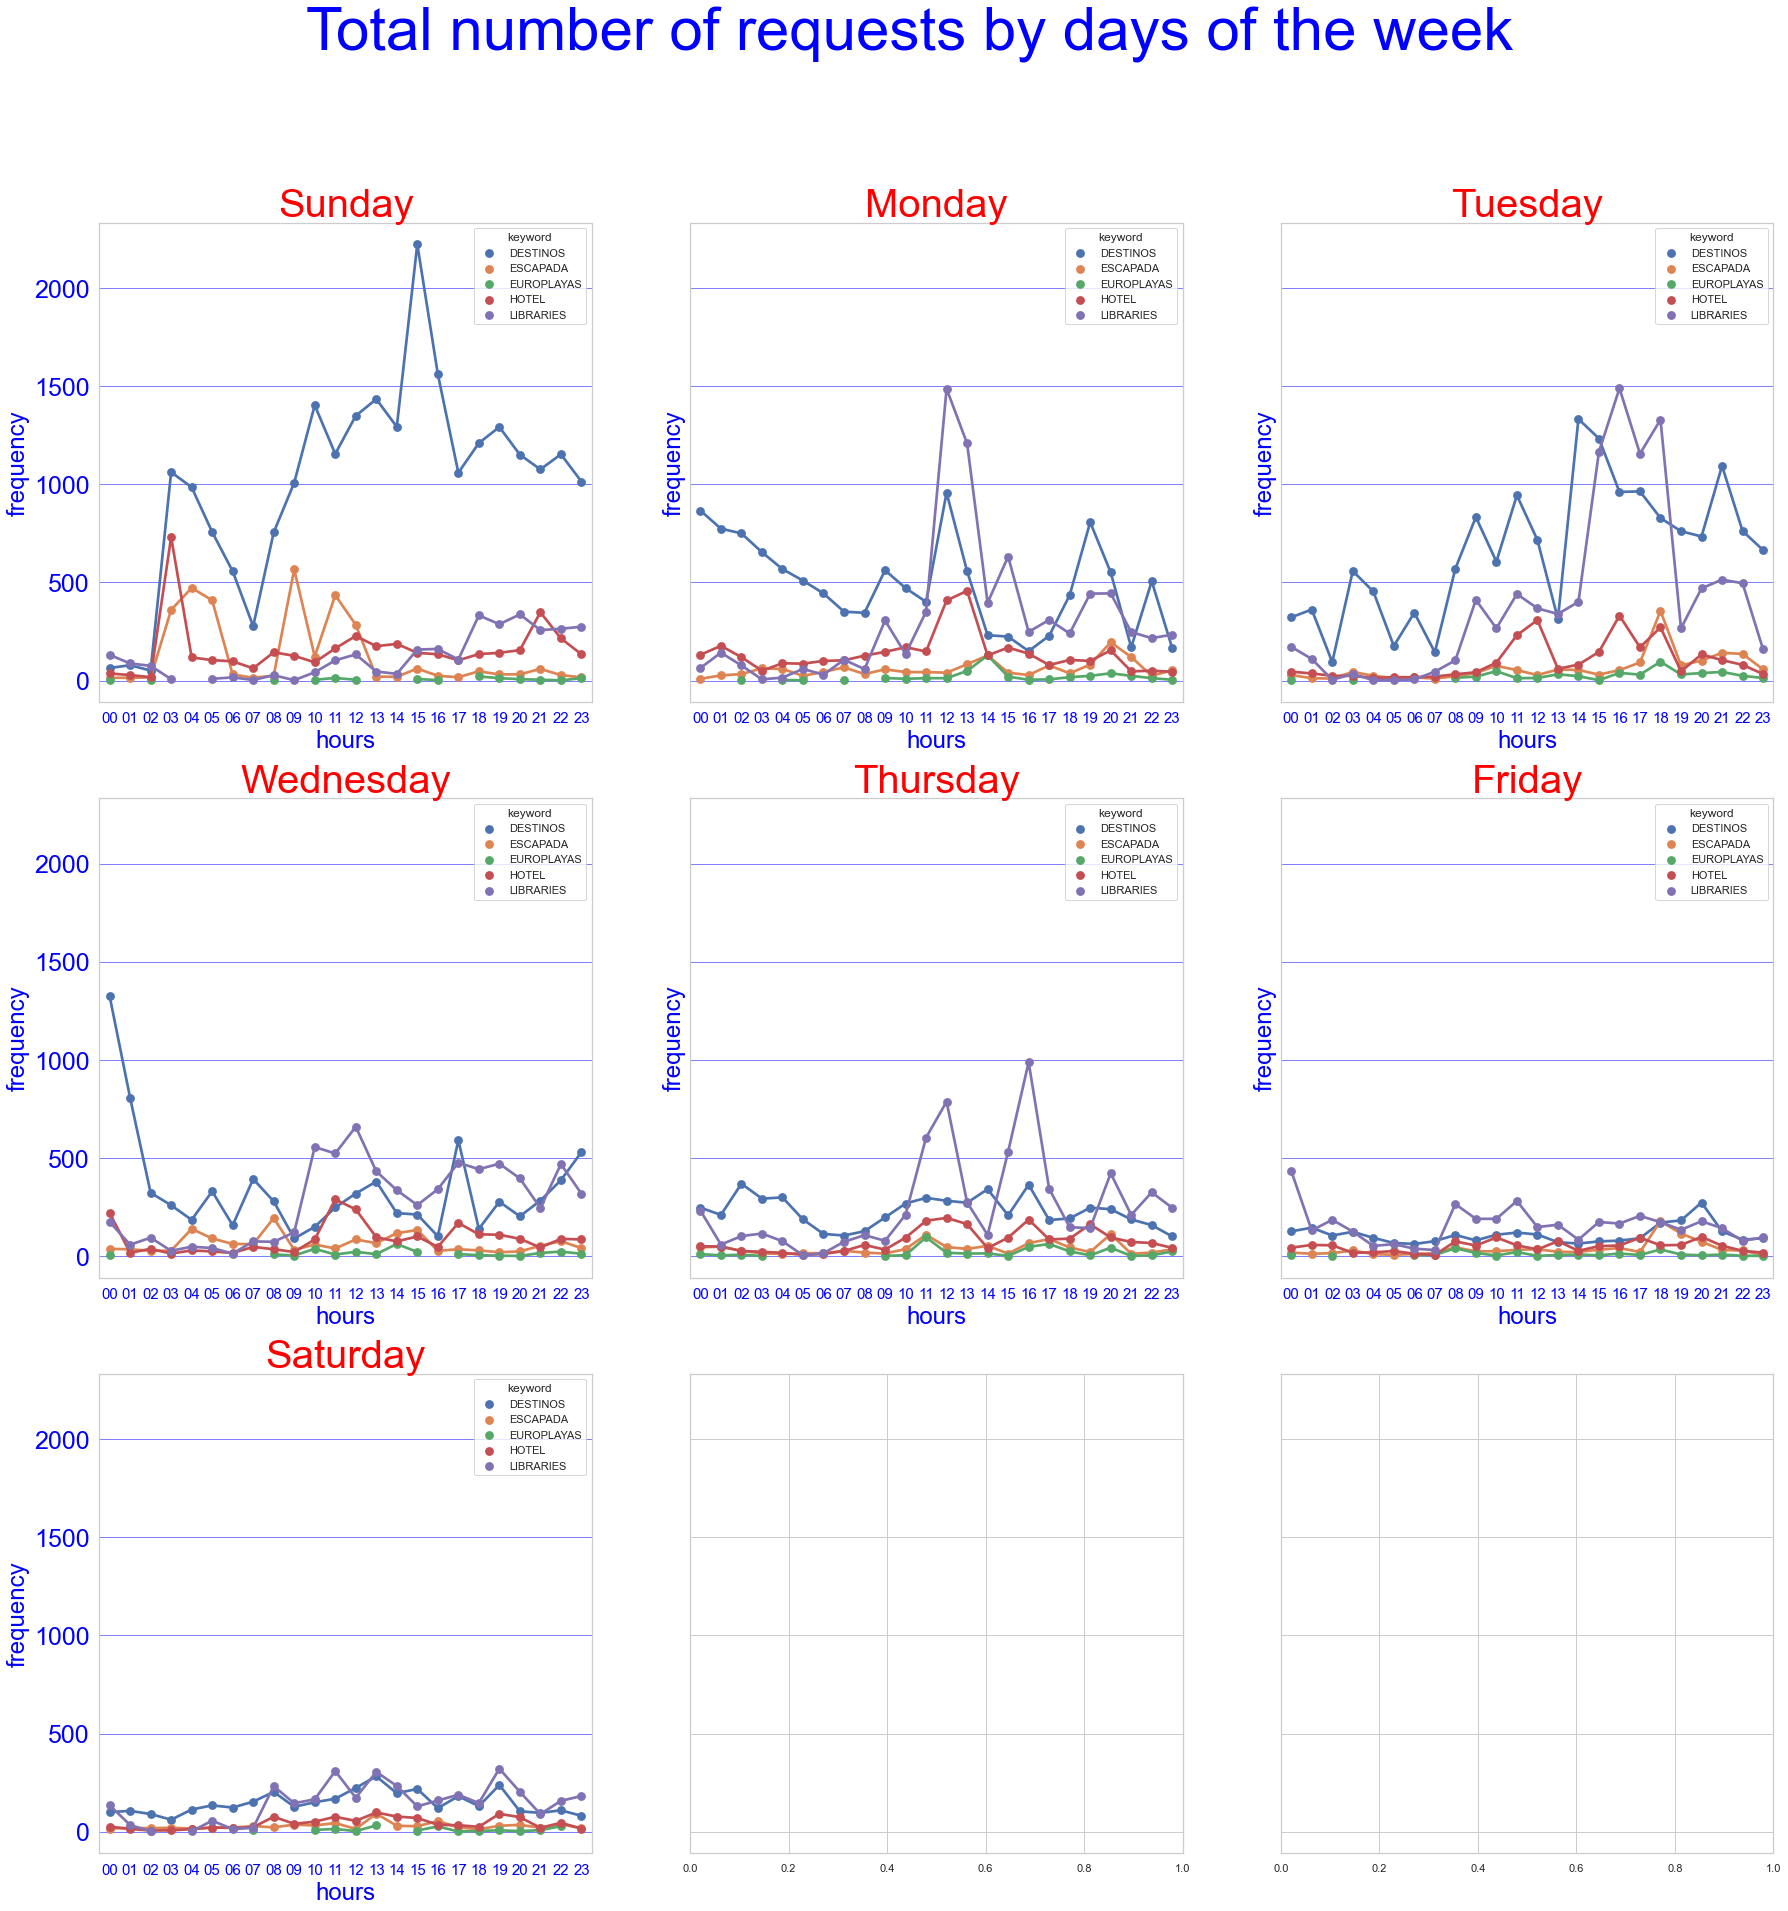

In [424]:
from matplotlib.patches import Patch
fig, axes = plt.subplots(3,3, figsize=(30, 30), sharey=True)
fig.suptitle('Total number of requests by days of the week',fontsize=60, color="blue")

week=df_top_key["day_week"].unique()

i=0
k=0
for day in week:
    ddf=df_top_key[df_top_key["day_week"]==day]
    sns.pointplot(ax=axes[k][i], x="hour", y="time", hue="keyword", data=ddf)
    axes[k][i].set_title(day,fontsize=40,color="red")   
    axes[k][i].set_ylabel("frequency",fontsize=24,color="blue")
    axes[k][i].set_xlabel("hours",fontsize=24,color="blue")    
    
    axes[k][i].tick_params(axis='y',labelsize=25, width=2, colors='blue',grid_color='blue', grid_alpha=0.5)
    axes[k][i].tick_params(axis='x',labelsize=15, width=2, colors='blue',grid_color='blue', grid_alpha=0.5)
      
    i+=1
    if i==3:
        k+=1
        i=0

sns.set(font_scale = 1)    
colors = sns.color_palette('husl', n_colors=len(x))
cmap = dict(zip(x, colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
sns.set_style("whitegrid")
plt.tick_params(axis='y', which='major', labelsize=40)
plt.show()